<a href="https://colab.research.google.com/github/ahmadhajmosa/ADINodeEditor/blob/master/ADI_Synthetic_Data_V2_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:

import uuid 

from datetime import datetime

start = datetime.strptime('1/1/2008', '%m/%d/%Y')
end = datetime.strptime('1/1/2009', '%m/%d/%Y')


from random import randrange
from datetime import timedelta

def random_date(start, end):
    """
    This function will return a random datetime between two datetime 
    objects.
    """
    delta = end - start
    #int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(delta.days)
    return start + timedelta(weeks=random_second)


columns = ['SHIP_TO','MATERIAL','INCOTERM']


ignore_columns = ['LABELS','ANOMALY']

unique_values = dict() 
unique_values['SHIP_TO'] = ['AT','DE']
unique_values['MATERIAL'] = ['1','0']

  


##################
# Define Rules
##################

def rules(df):
    if (df['SHIP_TO'] == 'AT') and (df['MATERIAL'] == '1'):
        return 'A1',0
    if (df['SHIP_TO'] == 'AT') and (df['MATERIAL'] == '0'):
        return 'A0',1
    else:
        return 'A2',2

##################
# Generate data
##################  

rows=[]
LABELS = []    
for i in range(100):
    #Ship from

    row = dict()

    for key,val in unique_values.items():

        row[key] = val[np.random.randint(len(val))]

    sr = pd.Series(row)
    tr,g = rules(sr)
    sr['Tx'] = tr
    sr['LABELS'] = g

    LABELS.append(g)
    #sr['ANOMALY'] = False

 
    rows.append(sr)  
org_data = pd.DataFrame(rows) 
org_data

,SHIP_TO,MATERIAL,Tx,LABELS
0,AT,1,A1,0
1,AT,0,A0,1
2,DE,1,A2,2
3,DE,0,A2,2
4,AT,1,A1,0
...,...,...,...,...
95,DE,1,A2,2
96,DE,1,A2,2
97,AT,1,A1,0
98,AT,0,A0,1


In [ ]:
import networkx as nx

def get_graph_nodes(org_data):


    nodes = []
    node_parent ={} 
    node_size_dict=dict()
    node_ind = 0
    node_color = []
    decisive_colums= ['SHIP_TO','MATERIAL','Tx']
    for col in org_data.columns[:-1]:
        for un in org_data[col].unique():
            nodes.append("{}-{}".format(col,un))
            
            node_size_dict["{}-{}".format(col,un)] = node_ind
            node_ind+=1

            if col in decisive_colums:
                node_color.append("green")
            else:
                node_color.append("blue")
    return nodes, node_size_dict, node_color

def get_graph_edges(org_data, node_size, node_size_dict, nodes):
    data = org_data[org_data.columns[:-1]].drop_duplicates()
    graph_array = pd.get_dummies(data,prefix_sep='-')
    cols = graph_array.columns
    edges = []
    edges_w = dict()
    node_size=np.zeros(len(nodes))

    for gr in range(len(graph_array)):
        sm = graph_array.iloc[gr].tolist()
        conn = np.argwhere(sm).tolist()
        #print(sm)
        for col in conn:
            for col2 in conn:
                #print(cols[col].values[0])
                it1 = cols[col].values[0]
                it2 = cols[col2].values[0]
                if col !=  col2:
                        edges.append([it1,it2])
                        edges_w['{}_{}'.format(it1,it2)] = 0
                        node_size[node_size_dict[it1]]+=1
                        node_size[node_size_dict[it2]]+=1


    #edges = []
    for gr in range(len(graph_array)):
        sm = graph_array.iloc[gr].tolist()
        conn = np.argwhere(sm).tolist()
        #print(sm)
        for col in conn:
            for col2 in conn:
                #print(cols[col].values[0])
                it1 = cols[col].values[0]
                it2 = cols[col2].values[0]
                if col !=  col2:
                        edges_w['{}_{}'.format(it1,it2)] +=1
                        edges.append((it1,it2, {'weight': edges_w['{}_{}'.format(it1,it2)]}))
    return edges                        
                    

def get_graph(nodes,edges):
    #build the graph
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G
def get_data_graph(org_data):
    nodes, node_size_dict, node_color = get_graph_nodes(org_data)
    edges = get_graph_edges(org_data, node_size, node_size_dict, nodes)
    G = get_graph(nodes,edges)
    return G, node_color

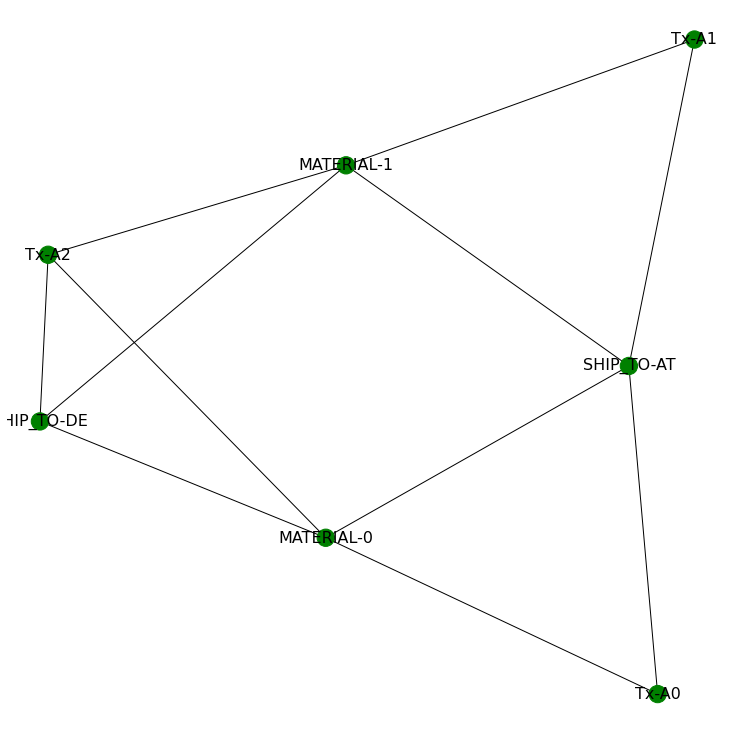

In [ ]:
G, node_color = get_data_graph(org_data)

pos = nx.circular_layout(G)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
nx.draw(G, font_size=16,node_color=node_color, with_labels=True)

plt.show()

In [ ]:
list(G.nodes)

['SHIP_TO-AT',
 'SHIP_TO-DE',
 'MATERIAL-1',
 'MATERIAL-0',
 'Tx-A1',
 'Tx-A0',
 'Tx-A2']

In [ ]:
def random_agent(G):
    number_of_predicates = np.random.randint(1,G.number_of_nodes())
    nodes_post = np.copy(list(G.nodes))
    np.random.shuffle(nodes_post) 
    predicates = nodes_post[:number_of_predicates]
    predicted = nodes_post[number_of_predicates]
    return(list(predicates),predicted)
random_agent(G)

(['SHIP_TO-DE', 'Tx-A1', 'MATERIAL-1', 'Tx-A2', 'Tx-A0'], 'MATERIAL-0')

In [ ]:
nodes 

['SHIP_TO-AT', 'MATERIAL-1', 'Tx-A1']

In [ ]:
A = nx.adjacency_matrix(G)
print('Graph info: ', nx.info(G))
adj = A.data

Graph info:  Name: 
Type: Graph
Number of nodes: 3
Number of edges: 3
Average degree:   2.0000


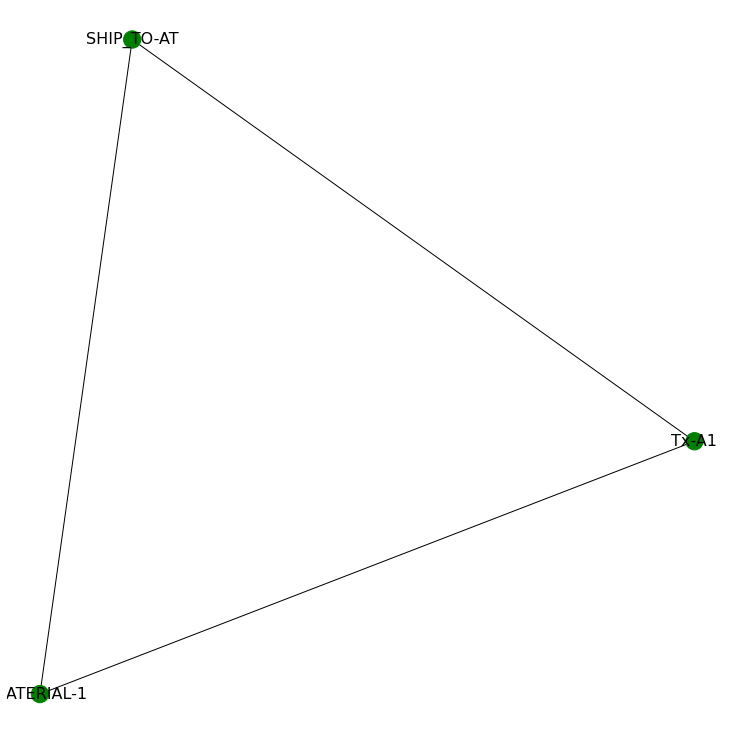

In [ ]:
pos = nx.circular_layout(G)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
nx.draw(G, font_size=16,node_color=node_color, with_labels=True)

plt.show()

In [ ]:
base = org_data[(org_data['SHIP_TO'] == 'AT') & (org_data['MATERIAL'] == '1') & (org_data['Tx'] == 'A1')].shape[0]
base_df = org_data[(org_data['SHIP_TO'] == 'AT') & (org_data['MATERIAL'] == '1') & (org_data['Tx'] == 'A1')]

case = org_data[(org_data['SHIP_TO'] == 'AT') & (org_data['MATERIAL'] == '1')].shape[0]

targ = org_data[(org_data['Tx'] == 'A1')].shape[0]

case/targ

1.0

In [ ]:
org_data = org_data.drop(base_df.index,axis=0)

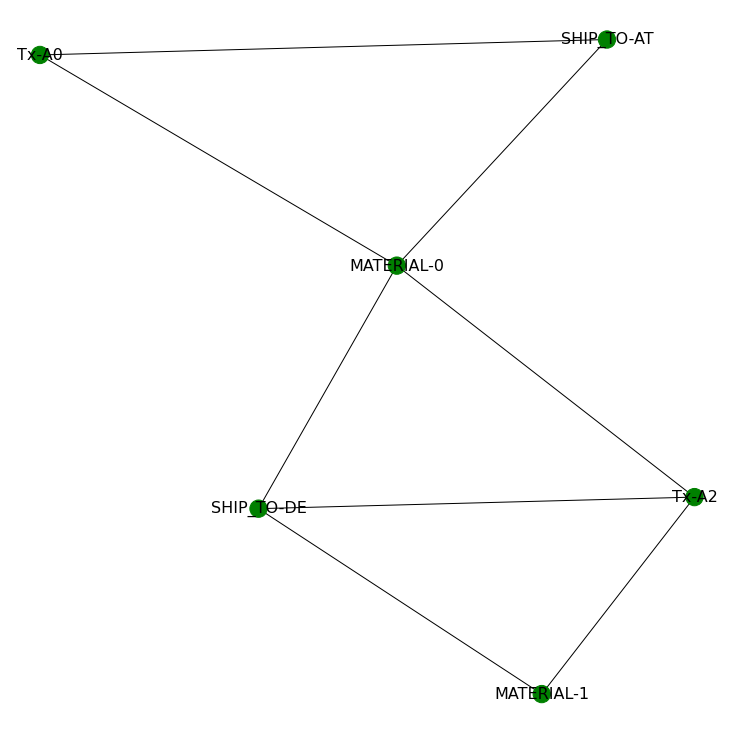

In [ ]:
G, node_color = get_data_graph(org_data)

pos = nx.circular_layout(G)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
nx.draw(G, font_size=16,node_color=node_color, with_labels=True)

plt.show()

In [ ]:
org_data[(org_data['MATERIAL'] == '1') & (org_data['Tx'] == 'A1')]

,SHIP_TO,MATERIAL,Tx,LABELS
8,AT,1,A1,0
10,AT,1,A1,0
12,AT,1,A1,0
13,AT,1,A1,0
16,AT,1,A1,0
18,AT,1,A1,0
28,AT,1,A1,0
31,AT,1,A1,0
34,AT,1,A1,0
36,AT,1,A1,0


In [ ]:
pos

{'BUYER-AT': array([0.47316126, 0.51548671]),
 'BUYER-CH': array([-0.70133876,  0.14708885]),
 'BUYER-DE': array([ 0.27056256, -0.42633976]),
 'BUYER-NL': array([0.02644985, 0.45588502]),
 'INCOTERM-0': array([-0.03127386, -0.11609658]),
 'INCOTERM-1': array([0.07653877, 0.12173706]),
 'MATERIAL-0': array([-0.25633687,  0.06809925]),
 'MATERIAL-1': array([ 0.27753785, -0.04495674]),
 'NOISE1-0': array([-0.40571324, -0.5502192 ]),
 'NOISE1-1': array([0.37789183, 0.26001023]),
 'NOISE1-3': array([-0.3219934 , -0.22362187]),
 'NOISE1-4': array([0.69251633, 0.32215279]),
 'NOISE2-02': array([ 0.51235782, -0.24649563]),
 'NOISE2-11': array([ 0.6496593 , -0.03614981]),
 'NOISE2-3': array([-0.6110052, -0.1636235]),
 'NOISE2-4': array([-0.64834794,  0.45185305]),
 'SHIP_TO-AT': array([ 0.14345122, -0.63210179]),
 'SHIP_TO-CH': array([-0.11039503,  0.86494895]),
 'SHIP_TO-DE': array([-0.05350326, -0.42608633]),
 'SHIP_TO-NL': array([-0.29627329,  0.63515411]),
 'Tx-A0': array([-0.84511922, -0.5

In [ ]:
import json
# this function is used to convert networkx to Cytoscape.js JSON format
# returns string of JSON
def convert2cytoscapeJSON(G):
    # load all nodes into nodes array
    final = {}
    final['nodes'] = []
    final['edges'] = [] 
    for node in G.nodes():
        #print(node)
        nx = {}
        nx['data'] = {}
        nx['data']['id'] = node
        nx['data']['label'] = node
        nx['position'] = {}
        nx['position']["x"] =pos[node][0]*1000
        nx['position']["y"] =pos[node][1]*1000
        final["nodes"].append(nx.copy())
    #load all edges to edges array
    for edge in G.edges():
        nx = {}
        nx['data']={}
        nx['data']['id']=edge[0]+"_" + edge[1]
        nx['data']['source']=edge[0]
        nx['data']['target']=edge[1]
        final['edges'].append(nx)
    return json.dumps(final)
ed = convert2cytoscapeJSON(G)
ed.replace('"nodes"','nodes').replace('"position"','position').replace('"data"','data').replace('"source"','source').replace('"target"','target').replace('"edges"','edges').replace('"id"','id').replace('"label"','label')

'{nodes: [{data: {id: "SHIP_TO-AT", label: "SHIP_TO-AT"}, position: {"x": 1000.0, "y": 1.986821479354822e-05}}, {data: {id: "SHIP_TO-DE", label: "SHIP_TO-DE"}, position: {"x": 766.0444394347109, "y": 642.7875913329416}}, {data: {id: "MATERIAL-0", label: "MATERIAL-0"}, position: {"x": 173.64822875361818, "y": 984.8077430671602}}, {data: {id: "MATERIAL-1", label: "MATERIAL-1"}, position: {"x": -500.0000496705369, "y": 866.0254023735695}}, {data: {id: "INCOTERM-0", label: "INCOTERM-0"}, position: {"x": -939.6926036166309, "y": 342.02023120707776}}, {data: {id: "INCOTERM-1", label: "INCOTERM-1"}, position: {"x": -939.6926036166309, "y": -342.02013186600385}}, {data: {id: "Tx-A0", label: "Tx-A0"}, position: {"x": -499.999900658926, "y": -866.0254222417842}}, {data: {id: "Tx-A1", label: "Tx-A1"}, position: {"x": 173.6481691489738, "y": -984.8077033307305}}, {data: {id: "Tx-A3", label: "Tx-A3"}, position: {"x": 766.0443202254221, "y": -642.7877304104451}}], edges: [{data: {id: "SHIP_TO-AT_MAT

In [ ]:
edges = []
edges_w = dict()
for gr in graph_array:
    list_of_nodes = []
    for col in np.argwhere(gr == 1).tolist():
        #print(col)
        list_of_nodes.append("{}_{}".format(col[0],col[1]))
        node_size[node_size_dict["{}_{}".format(col[0],col[1])]]+=1

    for it1 in list_of_nodes:
        for it2 in list_of_nodes:
            if it1 !=  it2:
                edges.append([it1,it2])
                edges_w['{}_{}'.format(it1,it2)] = 0


edges = []

for gr in graph_array:
    list_of_nodes = []
    for col in np.argwhere(gr == 1).tolist():
        #print(col)
        list_of_nodes.append("{}_{}".format(col[0],col[1]))
        #node_size[node_size_dict["{}_{}".format(col[0],col[1])]]+=1

    for it1 in list_of_nodes:
        for it2 in list_of_nodes:
            if it1 !=  it2:
                edges_w['{}_{}'.format(it1,it2)] += 1
                edges.append((it1,it2, {'weight': edges_w['{}_{}'.format(it1,it2)]}))

In [ ]:
org_data["SHIP_TO"].unique()

array(['DE', 'AT', 'CH', 'NL'], dtype=object)

In [ ]:
# generate synthetic data- 
# inputs number of columns and number of rows
# first select randomly how many columns are decisive
# next for each decisive column select randomly a row and make it equaly to one
# next for none decisve columns fill them with random values


def generate_batch(size_graph = 5,decisive_ratio = 0.5,channels=10):
    list_columns = np.arange(0,size_graph)
    np.random.shuffle(list_columns)
    number_decisve = 2
    #np.random.randint(2,decisive_ratio*size_graph)
    decisive_colums = list_columns[:number_decisve]
    none_decisive_colums = list_columns[number_decisve:]

    #print(decisive_colums)
    graph_array = np.zeros((size_graph,size_graph))
    data=  [] 
    for ch in range(channels):
        num_sum = 10
        graph_array = np.zeros((size_graph,size_graph))
        for col in decisive_colums:
            sel_val = np.random.randint(0,size_graph-1)
            graph_array[sel_val,col] = 1
        samp = []
        for i in range(num_sum):
            graph_array_copy = graph_array.copy()
            for col in none_decisive_colums:
                sel_val = np.random.randint(0,size_graph-1)
                graph_array_copy[sel_val,col] = 1
            samp.append(graph_array_copy)     
                    #print(sel_val,col)
        data+=samp
    
    target = np.zeros((size_graph))
    target[decisive_colums] = 1
    return data,target,decisive_colums
        #print(col)
    
    

In [ ]:
decisive_colums

array([3, 1])

In [ ]:
import pickle


In [ ]:
tr_data_x = []
tr_data_y = []

In [ ]:
for i in range(1):
    graph_array,target,decisive_colums = generate_batch()
    np.random.shuffle(graph_array)
    tr_data_x.append(graph_array)
    tr_data_y.append(target)

with open('tr_data_x', 'wb') as fp:
    pickle.dump(tr_data_x, fp)
with open('tr_data_y', 'wb') as fp:
    pickle.dump(tr_data_y, fp)

In [ ]:
supp = np.sum(graph_array,axis=0)/len(graph_array)

In [ ]:
supp

array([[0.22, 0.26, 0.2 , 0.3 , 0.32],
       [0.3 , 0.14, 0.2 , 0.  , 0.22],
       [0.2 , 0.18, 0.3 , 0.7 , 0.18],
       [0.28, 0.42, 0.3 , 0.  , 0.28],
       [0.  , 0.  , 0.  , 0.  , 0.  ]])

In [ ]:
decisive_colums

array([3, 2])

In [ ]:
nodes = []
node_size_dict=dict()
node_ind = 0
node_color = []
for i in range(5):
    for j in range(5):
        nodes.append("{}_{}".format(i,j))
        node_size_dict["{}_{}".format(i,j)] = node_ind
        node_ind+=1

        if j in decisive_colums:
            node_color.append("green")
        else:
            node_color.append("blue")


In [ ]:
node_size=np.zeros(len(nodes))


In [ ]:
edges = []
edges_w = dict()
for gr in graph_array:
    list_of_nodes = []
    for col in np.argwhere(gr == 1).tolist():
        #print(col)
        list_of_nodes.append("{}_{}".format(col[0],col[1]))
        node_size[node_size_dict["{}_{}".format(col[0],col[1])]]+=1

    for it1 in list_of_nodes:
        for it2 in list_of_nodes:
            if it1 !=  it2:
                edges.append([it1,it2])
                edges_w['{}_{}'.format(it1,it2)] = 0


edges = []

for gr in graph_array:
    list_of_nodes = []
    for col in np.argwhere(gr == 1).tolist():
        #print(col)
        list_of_nodes.append("{}_{}".format(col[0],col[1]))
        #node_size[node_size_dict["{}_{}".format(col[0],col[1])]]+=1

    for it1 in list_of_nodes:
        for it2 in list_of_nodes:
            if it1 !=  it2:
                edges_w['{}_{}'.format(it1,it2)] += 1
                edges.append((it1,it2, {'weight': edges_w['{}_{}'.format(it1,it2)]}))


In [ ]:
decisive_colums

array([2, 1])

In [ ]:
target

array([0., 0., 0., 1., 1.])

In [ ]:
node_size

array([14.,  5., 18., 10., 11., 14., 10., 14., 20., 10., 10., 10., 10.,
       15., 10., 12., 25.,  8.,  5., 19.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
import networkx as nx

#build the graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [ ]:
A = nx.adjacency_matrix(G)
print('Graph info: ', nx.info(G))
adj = A.data

Graph info:  Name: 
Type: Graph
Number of nodes: 25
Number of edges: 151
Average degree:  12.0800


In [ ]:
supp.shape

(5, 5)

In [ ]:
r = np.asarray(A.todense())/151

In [ ]:
agg = r*np.reshape(supp,(25,1))

In [ ]:
agg.sum(axis=0)

array([0.20874172, 0.22258278, 0.19278146, 0.16509934, 0.13788079,
       0.13635762, 0.15509934, 0.09649007, 0.1810596 , 0.18682119,
       0.06139073, 0.11807947, 0.19251656, 0.15331126, 0.2289404 ,
       0.2815894 , 0.21880795, 0.22761589, 0.2192053 , 0.16264901,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
agg.sum(axis=1)

array([0.2384106 , 0.2384106 , 0.19311258, 0.14013245, 0.09562914,
       0.10596026, 0.10596026, 0.05192053, 0.16556291, 0.17907285,
       0.02649007, 0.10596026, 0.19311258, 0.12821192, 0.25456954,
       0.42384106, 0.2384106 , 0.27125828, 0.2384106 , 0.15258278,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
agg = np.reshape(supp,(25,1))*r

In [ ]:
agg.sum(axis=0).reshape((5,5))

array([[0.20874172, 0.22258278, 0.19278146, 0.16509934, 0.13788079],
       [0.13635762, 0.15509934, 0.09649007, 0.1810596 , 0.18682119],
       [0.06139073, 0.11807947, 0.19251656, 0.15331126, 0.2289404 ],
       [0.2815894 , 0.21880795, 0.22761589, 0.2192053 , 0.16264901],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [ ]:
decisive_colums

array([0, 1])

In [ ]:
decisive_colums

array([2, 1])

In [ ]:
import plotly.graph_objects as go
#####

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))
#####

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

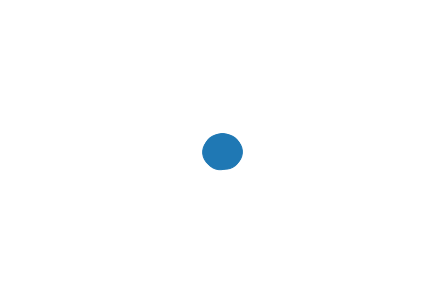

In [ ]:
d = dict(G.degree)

nx.draw(G, nodelist=d.keys(), node_size=[v * 100 for v in d.values()])


In [ ]:
[np.random.randint(1,10)*v for v in range(len(nodes))]

[0,
 9,
 18,
 9,
 20,
 30,
 18,
 28,
 72,
 63,
 70,
 22,
 108,
 52,
 70,
 135,
 64,
 34,
 108,
 133,
 180,
 168,
 66,
 184,
 144,
 225,
 130,
 81,
 224,
 87,
 60,
 186,
 288,
 297,
 34,
 105,
 252,
 259,
 190,
 273,
 200,
 205,
 168,
 43,
 352,
 405,
 138,
 141,
 48,
 147,
 250,
 357,
 52,
 424,
 486,
 55,
 112,
 285,
 464,
 59,
 420,
 183,
 372,
 567,
 256,
 520,
 66,
 402,
 272,
 414,
 490,
 355,
 144,
 219,
 148,
 300,
 456,
 231,
 468,
 474,
 80,
 81,
 410,
 332,
 588,
 765,
 86,
 87,
 528,
 356,
 270,
 273,
 828,
 186,
 94,
 475,
 576,
 194,
 294,
 198]

In [ ]:
target

array([0., 1., 0., 0., 1., 1., 0., 0., 0., 0.])

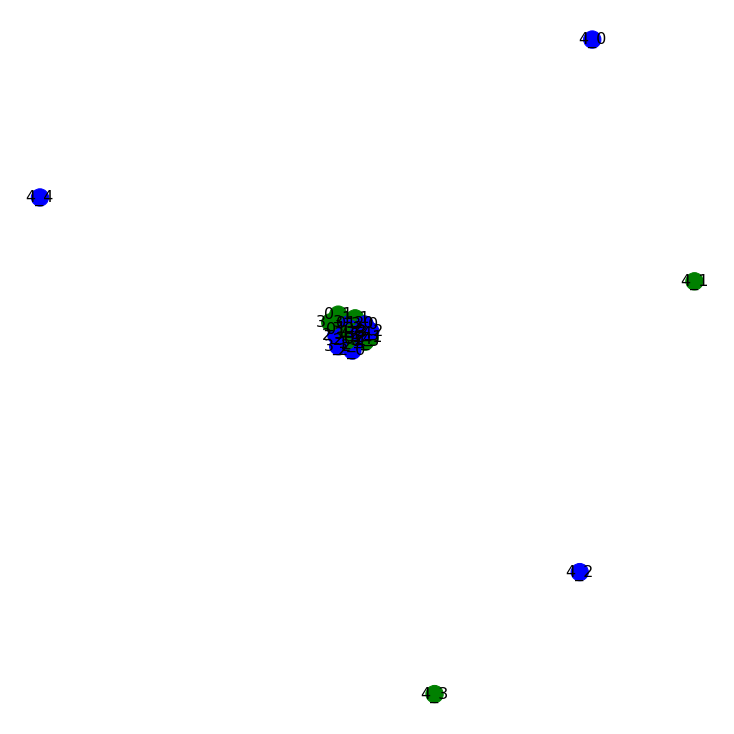

In [ ]:
pos = nx.random_layout(G)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
nx.draw(G, font_size=16,node_color=node_color, with_labels=True)

plt.show()

In [ ]:
decisive_colums

array([0, 3])

In [ ]:
nx.write_gml(G,'g.gml')
nx.write_graphml(G,'g.xml')

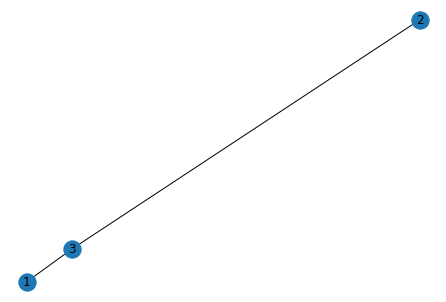

In [ ]:
#!/usr/bin/python
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
i=1
G.add_node(1)
G.add_node(2)
G.add_node(3)
#G.add_edge(1,2,weight=0)
#G.add_edge(1,3,weight=9.8)
edges = [(1,3,{'weight': 1005}),(2,3,{'weight': 3.1415})]
G.add_edges_from(edges)
#pos=nx.get_node_attributes(G,'pos')
pos = nx.random_layout(G)

nx.draw(G, with_labels=True)

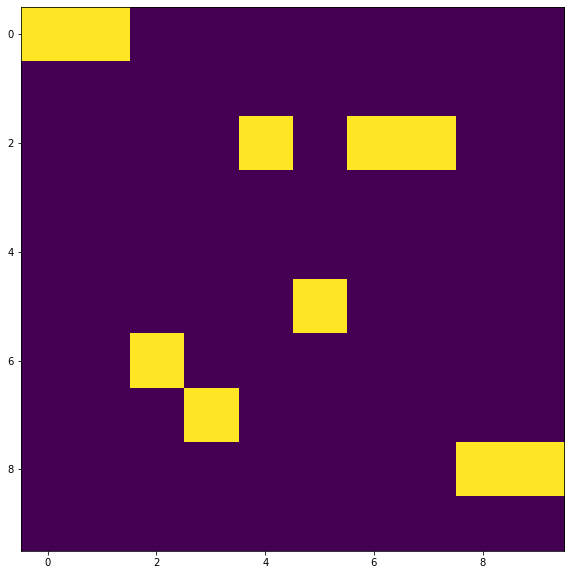

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(graph_array[2])

In [ ]:
max_col = 100
max_un = 100
max_cluster = 10
max_rules = 10
max_terms = 5

term_to_ind = dict()
ind_to_term = dict()

rl_ind = 0
for cat in range(5):
    if cat == 0:
        for col in range(max_col):
            for un in range(max_un):
                term_to_ind['df["x{}"] == "un{}"'.format(col,un)] = rl_ind
                ind_to_term[rl_ind] = 'df["x{}"] == "un{}"'.format(col,un)
                rl_ind+=1
    elif cat == 1:
        for col in range(max_col):
            for un in range(max_un):
                term_to_ind['df["x{}"] != "un{}"'.format(col,un)] = rl_ind
                ind_to_term[rl_ind] = 'df["x{}"] != "un{}"'.format(col,un)
                rl_ind+=1        
    elif cat == 3:
        for col_1 in range(max_col):
            for col_2 in range(max_col):
                term_to_ind['(df["x{}"] == df["x{}"])'.format(col_1,col_2)] = rl_ind
                ind_to_term[rl_ind] = '(df["x{}"] == df["x{}"])'.format(col_1,col_2)
                rl_ind+=1   
    elif cat == 4:
        for col_1 in range(max_col):
            for col_2 in range(max_col):
                term_to_ind['(df["x{}"] != df["x{}"])'.format(col_1,col_2)] = rl_ind
                ind_to_term[rl_ind] = '(df["x{}"] != df["x{}"])'.format(col_1,col_2)
                rl_ind+=1                 
ind_to_term   

{0: 'df["x0"] == "un0"',
 1: 'df["x0"] == "un1"',
 2: 'df["x0"] == "un2"',
 3: 'df["x0"] == "un3"',
 4: 'df["x0"] == "un4"',
 5: 'df["x0"] == "un5"',
 6: 'df["x0"] == "un6"',
 7: 'df["x0"] == "un7"',
 8: 'df["x0"] == "un8"',
 9: 'df["x0"] == "un9"',
 10: 'df["x0"] == "un10"',
 11: 'df["x0"] == "un11"',
 12: 'df["x0"] == "un12"',
 13: 'df["x0"] == "un13"',
 14: 'df["x0"] == "un14"',
 15: 'df["x0"] == "un15"',
 16: 'df["x0"] == "un16"',
 17: 'df["x0"] == "un17"',
 18: 'df["x0"] == "un18"',
 19: 'df["x0"] == "un19"',
 20: 'df["x0"] == "un20"',
 21: 'df["x0"] == "un21"',
 22: 'df["x0"] == "un22"',
 23: 'df["x0"] == "un23"',
 24: 'df["x0"] == "un24"',
 25: 'df["x0"] == "un25"',
 26: 'df["x0"] == "un26"',
 27: 'df["x0"] == "un27"',
 28: 'df["x0"] == "un28"',
 29: 'df["x0"] == "un29"',
 30: 'df["x0"] == "un30"',
 31: 'df["x0"] == "un31"',
 32: 'df["x0"] == "un32"',
 33: 'df["x0"] == "un33"',
 34: 'df["x0"] == "un34"',
 35: 'df["x0"] == "un35"',
 36: 'df["x0"] == "un36"',
 37: 'df["x0"] == "un

In [ ]:
import numpy as np
from random import sample
import pandas as pd
input_ds = []
target_ds = []
input_adj = []
##
import pickle


train_examples_in=[]
train_examples_rule=[]





for nd in range(100):
    #    print(nd)
    

    try:

        

        n_clusters = np.random.randint(5, max_cluster)
        target = []
        for cl in range(n_clusters):
            target.append('{}'.format(cl))

        n_col = np.random.randint(2, max_col)
        columns = []
        for i in range(n_col):
            columns.append('x{}'.format(i))
        # unique values

        unique_values = dict()
        for col in range(n_col):
            n_uniq = np.random.randint(2, max_un)
            unique_values[columns[col]] = []
            for un in range(n_uniq):
                unique_values[columns[col]].append("un{}".format(un))

        # number of rules
        rules = []
        rules_tr = []

        ##################### state variable ############################
        n_rules = np.random.randint(5, max_rules)

        for rl in range(n_rules):
            # number of terms
            
            ##################### state variable ############################
            n_terms = np.random.randint(3, max_terms)

            col_tem = columns.copy()
            
            col_tem = np.random.permutation(col_tem).tolist()

            total_rule = ''

            for tr in range(n_terms):
                # category of rule
                ##################### state variable ############################
                cat = np.random.choice([0, 3])

                if len(col_tem) == 0:
                    break

                if cat == 0:
                    
                    ##################### state variable ############################
                    sel_col = col_tem.pop()
                    ##################### state variable ############################
                    un = np.random.choice(unique_values[sel_col])

                    rule = '(df["{}"] == "{}") & '.format(sel_col, un)
                    total_rule += rule
                elif cat == 1:
                    ##################### state variable ############################
                    sel_col = col_tem.pop()
                    ##################### state variable ############################
                    un = np.random.choice(unique_values[sel_col])


                    rule = '(df["{}"] != "{}") & '.format(sel_col, un)
                    
                    # print(rule)
                    total_rule += rule

                elif cat == 2:
                    # (df['Ship_to'] in ['DE','IT','ES','NL'])
                    ##################### state variable ############################
                    sel_col = col_tem.pop()
                    if len(unique_values[sel_col]) <= 2:
                        continue
                    num_un = np.random.randint(2, len(unique_values[sel_col]))
                    ##################### state variable ############################
                    uniques = sample(unique_values[sel_col], num_un)
                    rule = '(df["{}"] in {}) & '.format(sel_col, uniques)
                    
                    # print(rule)
                    total_rule += rule


                elif cat == 3:
                    # df['Ship_to'] == df['Buyer']
                    sel_col_1 = col_tem.pop()
                    if len(col_tem) == 0:
                        break
                    sel_col_2 = col_tem.pop()

                    rule = '(df["{}"] == df["{}"]) & '.format(sel_col_1, sel_col_2)
                    
                    # print(rule)
                    total_rule += rule


                elif cat == 4:
                    # df['Ship_to'] != df['Buyer']
                    sel_col_1 = col_tem.pop()
                    if len(col_tem) == 0:
                        break
                    sel_col_2 = col_tem.pop()

                    rule = '(df["{}"] != df["{}"]) & '.format(sel_col_1, sel_col_2)

                    # print(rule)
                    total_rule += rule

            total_rule = total_rule[:-3]

            tr = np.random.choice(target)
            total_rule_tr = total_rule + ' -> ' + tr
            rules.append(total_rule)
            rules_tr.append(total_rule_tr)

            # print(total_rule)

        fun = 'def rules_gen(df,rules_oc_dict):\n'
        target = ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']
        rules_oc_dict = dict()  # rules occurance dictinary

        for ri, rule in enumerate(rules):
            if rule !='':
                fun += '\tif {}:\n'.format(rule)
                fun += '\t'
                #tr = np.random.choice(target)
                tr = rules_tr[ri].split(' -> ')[1]
                fun +='\trules_oc_dict[{}]+=1\n'.format(ri)
                fun += '\t\treturn "{}",rules_oc_dict\n'.format(tr)
                rules_oc_dict[ri] = 0
        fun += '\telse:\n'
        tr = np.random.choice(target)
        fun += '\t\treturn "{}",rules_oc_dict\n'.format('{}'.format(n_clusters))

        #print(fun)

        fun = '''{}'''.format(fun)
        exec(fun)

        rows = []
        for i in range(100):
            # Ship from

            row = dict()

            for key, val in unique_values.items():
                row[key] = val[np.random.randint(len(val))]

            sr = pd.Series(row)
            tr,rules_oc_dict = rules_gen(sr,rules_oc_dict)
            sr['A'] = tr
            rows.append(sr)
        fun = 'def rules_gen(df,rules_oc_dict):\n'
        tr = 0
        for ri, rule in enumerate(rules):
            if rules_oc_dict[ri] >0:
                

                fun += '\tif {}:\n'.format(rule)
                fun += '\t'
                # tr = np.random.choice(target)
                tr = rules_tr[ri].split(' -> ')[1]
                fun += '\treturn "{}"\n'.format(tr)
        fun += '\telse:\n'
        tr = np.random.choice(target)
        fun += '\t\treturn "{}"\n'.format('{}'.format(n_clusters))

        print('after',fun)
        target_ds.append(' OR '.join(rules_tr))


        data = pd.DataFrame(rows)
        train_examples_in.append(data)
        train_examples_rule.append(fun)
    except:
        continue

after def rules_gen(df,rules_oc_dict):
	else:
		return "8"

after def rules_gen(df,rules_oc_dict):
	else:
		return "9"

after def rules_gen(df,rules_oc_dict):
	else:
		return "7"

after def rules_gen(df,rules_oc_dict):
	else:
		return "6"

after def rules_gen(df,rules_oc_dict):
	else:
		return "5"

after def rules_gen(df,rules_oc_dict):
	else:
		return "9"

after def rules_gen(df,rules_oc_dict):
	else:
		return "9"

after def rules_gen(df,rules_oc_dict):
	else:
		return "6"

after def rules_gen(df,rules_oc_dict):
	else:
		return "6"

after def rules_gen(df,rules_oc_dict):
	else:
		return "9"

after def rules_gen(df,rules_oc_dict):
	else:
		return "7"

after def rules_gen(df,rules_oc_dict):
	else:
		return "5"

after def rules_gen(df,rules_oc_dict):
	else:
		return "9"

after def rules_gen(df,rules_oc_dict):
	else:
		return "6"

after def rules_gen(df,rules_oc_dict):
	else:
		return "8"

after def rules_gen(df,rules_oc_dict):
	else:
		return "7"

after def rules_gen(df,rules_oc_dict):
	

In [ ]:
train_examples_in[4][train_examples_in[4]["A"] == "6"]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,A
0,un30,un2,un1,un48,un6,un47,un4,un32,un27,un22,un25,un20,un4,un5,un33,un0,un7,un22,un55,un16,un29,un1,un74,un37,un7,un3,un21,un5,un34,un23,un56,un31,un3,un23,un13,un31,un26,un9,un3,un43,un43,un33,6
1,un45,un7,un1,un6,un16,un29,un48,un28,un38,un5,un13,un37,un6,un24,un17,un0,un34,un2,un47,un16,un47,un0,un17,un37,un4,un0,un65,un3,un49,un41,un46,un54,un6,un57,un39,un62,un19,un13,un20,un0,un40,un9,6
2,un32,un11,un0,un20,un30,un24,un31,un20,un11,un22,un5,un59,un24,un25,un26,un0,un20,un30,un34,un14,un46,un2,un47,un1,un29,un3,un54,un17,un63,un49,un32,un51,un19,un3,un51,un85,un20,un82,un14,un21,un30,un34,6
3,un6,un18,un1,un13,un0,un58,un20,un32,un20,un16,un10,un6,un52,un18,un20,un1,un20,un20,un25,un9,un47,un2,un29,un37,un0,un0,un52,un24,un54,un16,un44,un60,un27,un79,un75,un87,un31,un62,un46,un3,un3,un1,6
4,un83,un21,un0,un69,un17,un50,un6,un19,un44,un3,un16,un13,un32,un21,un35,un0,un5,un5,un19,un7,un20,un3,un50,un33,un8,un5,un3,un17,un21,un12,un23,un27,un67,un72,un2,un29,un3,un7,un33,un40,un58,un9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,un51,un10,un0,un53,un18,un19,un0,un15,un41,un18,un26,un40,un42,un17,un22,un0,un9,un5,un4,un16,un21,un4,un30,un35,un12,un1,un25,un16,un19,un20,un9,un6,un28,un23,un46,un56,un0,un34,un21,un29,un50,un39,6
96,un53,un2,un0,un18,un50,un73,un8,un9,un30,un15,un14,un59,un48,un6,un20,un1,un21,un7,un78,un16,un37,un5,un28,un50,un12,un0,un56,un24,un19,un10,un48,un45,un39,un38,un87,un85,un24,un82,un39,un26,un39,un1,6
97,un34,un19,un1,un17,un23,un14,un47,un8,un17,un12,un13,un16,un13,un26,un9,un1,un26,un19,un83,un12,un29,un0,un26,un37,un24,un1,un15,un4,un6,un27,un37,un56,un49,un60,un39,un12,un48,un78,un6,un3,un55,un22,6
98,un66,un15,un0,un77,un33,un16,un8,un12,un49,un48,un2,un6,un34,un17,un33,un0,un33,un11,un30,un4,un14,un1,un28,un34,un18,un2,un12,un21,un33,un35,un50,un46,un63,un19,un71,un13,un48,un19,un26,un39,un67,un17,6


In [ ]:
print(train_examples_rule[4])

def rules_gen(df,rules_oc_dict):
	if (df["x41"] != "un36") & (df["x33"] == df["x12"]) & (df["x1"] != "un16"):
		return "4"
	if (df["x33"] != "un30") & (df["x0"] != "un38") & (df["x38"] != "un43") & (df["x26"] == "un30"):
		return "0"
	else:
		return "6"

